In [1]:
# 기본 작업 경로 설정
import os
import matplotlib.pyplot as plt
notebook_path = os.path.abspath("../readme.md")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /mnt/e/py_data/project_3_git


In [2]:
import json

def openjson(path):

    with open(path, encoding="cp949") as f:
        data = json.load(f)
    return data

trainjsons = []
testjsons  = []
validjsons = []

trainjsons.extend([i for i in openjson('data/face_lables/train_label/train_anger.json')])
trainjsons.extend([i for i in openjson('data/face_lables/train_label/train_happy.json')])
trainjsons.extend([i for i in openjson('data/face_lables/train_label/train_panic.json')])
trainjsons.extend([i for i in openjson('data/face_lables/train_label/train_sadness.json')])

validjsons.extend([i for i in openjson('data/face_lables/val_label/val_anger.json')])
validjsons.extend([i for i in openjson('data/face_lables/val_label/val_happy.json')])
validjsons.extend([i for i in openjson('data/face_lables/val_label/val_panic.json')])
validjsons.extend([i for i in openjson('data/face_lables/val_label/val_sadness.json')])

testjsons.extend([i for i in openjson('data/face_lables/test_label/test_anger.json')])
testjsons.extend([i for i in openjson('data/face_lables/test_label/test_happy.json')])
testjsons.extend([i for i in openjson('data/face_lables/test_label/test_panic.json')])
testjsons.extend([i for i in openjson('data/face_lables/test_label/test_sadness.json')])

# RCNN 및 SSD 어노테이션

In [3]:


# # json 에서 파일 이름과 박스 및 라벨 가져와 새로정의
# emotion_mapping = {0 : '분노', 1 : '슬픔', 2 : '당황', 3 : '기쁨'}
# emotion_mapping_reversed = {j: i for i, j in zip(emotion_mapping.keys(), emotion_mapping.values())}


In [4]:

# filename_train = []
# boxes_train = []
# lables_train = []
# for i in trainjsons:
#     filename_train.append(i['filename'])
#     lables_train.append(emotion_mapping_reversed[i['faceExp_uploader']])
#     boxes_train.append([ 
#         i['annot_A']['boxes']['maxX'], 
#         i['annot_A']['boxes']['maxY'], 
#         i['annot_A']['boxes']['minX'], 
#         i['annot_A']['boxes']['minY']
#     ])


# filename_valid = []
# boxes_valid = []
# lables_valid = []
# for i in validjsons:
#     filename_valid.append(i['filename'])
#     lables_valid.append(emotion_mapping_reversed[i['faceExp_uploader']])
#     boxes_valid.append([ 
#         i['annot_A']['boxes']['maxX'], 
#         i['annot_A']['boxes']['maxY'], 
#         i['annot_A']['boxes']['minX'], 
#         i['annot_A']['boxes']['minY']
#     ])

In [5]:
# import cv2
# import numpy as np

# def resize_and_pad_image_and_boxes(image_path, boxes, target_size=(512, 512)):
#     # 이미지 로드
#     image = cv2.imread(image_path)
#     orig_height, orig_width = image.shape[:2]
    
#     # 목표 크기
#     target_width, target_height = target_size
    
#     # 비율 계산
#     aspect_ratio = orig_width / orig_height
#     target_aspect_ratio = target_width / target_height
    
#     if aspect_ratio > target_aspect_ratio:
#         # 너비 기준으로 리사이즈
#         new_width = target_width
#         new_height = int(target_width / aspect_ratio)
#     else:
#         # 높이 기준으로 리사이즈
#         new_height = target_height
#         new_width = int(target_height * aspect_ratio)
    
#     # 리사이즈된 이미지 생성
#     resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
#     # 목표 크기의 검은색 배경 이미지 생성
#     new_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)
    
#     # 중앙에 리사이즈된 이미지를 붙히기
#     paste_x = (target_width - new_width) // 2
#     paste_y = (target_height - new_height) // 2
#     new_image[paste_y:paste_y + new_height, paste_x:paste_x + new_width] = resized_image
#     boxed_image = new_image.copy()
    
#     # 박스 좌표 조정
#     resized_boxes = []
#     for box in boxes:
#         x_min, y_min, x_max, y_max = box
        
#         # 원본 이미지에서의 상대 위치
#         x_min_rel = x_min / orig_width
#         y_min_rel = y_min / orig_height
#         x_max_rel = x_max / orig_width
#         y_max_rel = y_max / orig_height
        
#         # 목표 이미지에서의 절대 위치
#         x_min_new = int(x_min_rel * new_width + paste_x)
#         y_min_new = int(y_min_rel * new_height + paste_y)
#         x_max_new = int(x_max_rel * new_width + paste_x)
#         y_max_new = int(y_max_rel * new_height + paste_y)
        
#         resized_boxes.append([x_min_new, y_min_new, x_max_new, y_max_new])
    
#     # 박스 그리기
#     for box in resized_boxes:
#         x_min, y_min, x_max, y_max = box
#         cv2.rectangle(boxed_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    
#     return boxed_image, new_image, resized_boxes

In [6]:

# i = 55
# # 이미지 경로와 박스 좌표
# image_path = f'data/yolo_data/train/{filename_train[i]}'
# target_size = (512, 512)

# # 이미지 리사이즈, 패딩 및 박스 좌표 조정
# padded_image, new_image, resized_boxes = resize_and_pad_image_and_boxes(image_path, [boxes_train[i]], target_size)

# # 결과 보기
# plt.imshow(padded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # 조정된 박스 좌표 출력
# print(resized_boxes)

In [7]:
# dataset_train = {}
# imgsnp = []
# imgslabel = []
# imgsboxes = []
# for filen, box_, label_ in zip(filename_train, boxes_train, lables_train):
#     print(filen,box_,label_)
#     # 이미지 리사이즈, 패딩 및 박스 좌표 조정
#     try:
#         boxed_img, new_image, resized_boxes = resize_and_pad_image_and_boxes(
#             'data/yolo_data/train/' + filen,
#              [box_], (512, 512))
#         imgsnp.append(new_image)
#         imgslabel.append([label_])
#         imgsboxes.append(resized_boxes)
#     except:
#         pass

# dataset_train['imgs']=imgsnp
# dataset_train['labels']=imgslabel
# dataset_train['boxes']=imgsboxes

In [8]:

# dataset_valid = {}
# imgsnp = []
# imgslabel = []
# imgsboxes = []
# for filen, box_, label_ in zip(filename_valid, boxes_valid, lables_valid):
#     print(filen,box_,label_)
#     # 이미지 리사이즈, 패딩 및 박스 좌표 조정
#     try:
#         boxed_img, new_image, resized_boxes = resize_and_pad_image_and_boxes(
#             'data/yolo_data/val/' + filen,
#              [box_], (512, 512))
#         imgsnp.append(new_image)
#         imgslabel.append([label_])
#         imgsboxes.append(resized_boxes)
#     except:
#         pass

# dataset_valid['imgs']=imgsnp
# dataset_valid['labels']=imgslabel
# dataset_valid['boxes']=imgsboxes

In [9]:
# import pickle

# dataset_train
# dataset_valid

# with open('data/ssd_rcnn_face/train.json', 'wb') as f:
#     pickle.dump(dataset_train, f)

# with open('data/ssd_rcnn_face/valid.json', 'wb') as f:
#     pickle.dump(dataset_valid, f)

# annotaion for coco (faster rcnn)

In [10]:
import json
import os
from PIL import Image
from PIL.ExifTags import TAGS

In [11]:

# 카테고리 정의 (실제 클래스 수와 이름에 맞게 수정)
categories = [
    {'id': 1, 'name': 'angry'},
    {'id': 2, 'name': 'sad'},
    {'id': 3, 'name': 'surprised'},
    {'id': 4, 'name': 'happy'},
    # 추가 카테고리
]

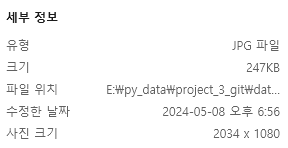

In [12]:
# 오리엔테이션 정보를 가져와 확인 - 회전된 이미지를 원래대로 돌릴 필요가 있다
img = Image.open('data/yolo_data/train/0hbp81f967310380f8f843e9e20887035087603a3300266ead1d507483c67dxnj.jpg')

img_info = img._getexif()
for tag_id in img_info:
    tag = TAGS.get(tag_id, tag_id)
    data = img_info.get(tag_id)
    print(f'{tag} : {data}')
img.close()

ImageWidth : 1080
ImageLength : 2034
Orientation : 6
ExifOffset : 62
LightSource : 0


In [13]:
# 이미지 열기
with Image.open('data/yolo_data/train/0hbp81f967310380f8f843e9e20887035087603a3300266ead1d507483c67dxnj.jpg') as img:
    # EXIF 데이터 가져오기
    exif = img._getexif()

    # Orientation 태그 가져오기
    orientation_key = [key for key, val in TAGS.items() if val == 'Orientation'][0]
    orientation = exif.get(orientation_key, 1)

    # Orientation에 따라 이미지 회전
    if orientation == 3:
        img = img.rotate(180, expand=True)
    elif orientation == 6:
        img = img.rotate(270, expand=True)
    elif orientation == 8:
        img = img.rotate(90, expand=True)

    # 이미지 크기 확인
    width, height = img.size
    print(f"Width: {width}, Height: {height}")

Width: 2034, Height: 1080


In [14]:
categories = [
        {
            "id": 1,
            "name": "angry"
        },
        {
            "id": 2,
            "name": "sad"
        },
        {
            "id": 3,
            "name": "surprised"
        },
        {
            "id": 4,
            "name": "happy"
        }
    ]

In [27]:
# 데이터 경로 설정
image_dir = 'data/yolo_data/train/', 'data/yolo_data/val/'
annotation_dir = 'data/yolo_data/train/', 'data/yolo_data/val/'
output_json_path = 'data/ssd_rcnn_face/annotations.json', 'data/ssd_rcnn_face/annotations_val.json'

for dir_,anno_dir,json_dir in zip(image_dir, annotation_dir, output_json_path):
    # COCO 형식 JSON 구조 초기화
    coco_format = {
        'images': [],
        'annotations': [],
        'categories': categories
    }

    annotation_id = 0
    image_id = 0

    # 디버깅용 체크
    tocheck = []

    def read_image_size_from_exif(image_path):
        with Image.open(image_path) as img:
            # EXIF 데이터 가져오기
            exif = img._getexif()

            # EXIF 데이터가 없을 경우 기본 크기 반환
            if exif is None:
                return img.size

            # Orientation 태그 가져오기
            orientation_key = [key for key, val in TAGS.items() if val == 'Orientation'][0]
            orientation = exif.get(orientation_key, 1)  # EXIF에서 Orientation 값이 없으면 기본값 1을 사용

            # Orientation에 따라 이미지 회전
            if orientation == 3:
                img = img.rotate(180, expand=True)
            elif orientation == 6:
                img = img.rotate(270, expand=True)
            elif orientation == 8:
                img = img.rotate(90, expand=True)

            # 회전된 후의 이미지 크기 반환
            return img.size
    def read_image_size(image_file):
        with Image.open(image_file) as img:
            return img.size

    for image_file in os.listdir(dir_):
        if not image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        image_path = os.path.join(dir_, image_file)
        width, height = read_image_size_from_exif(image_path)

            # 이미지 메타데이터 추가
        coco_format['images'].append({
            'id': image_id,
            'file_name': image_file,
            'width': width,
            'height': height
        })

        # .txt 파일에서 어노테이션 읽기
        txt_file = image_file.rsplit('.', 1)[0] + '.txt'
        txt_path = os.path.join(anno_dir, txt_file)

        if not os.path.exists(txt_path):
            continue
        
        with open(txt_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0]) + 1
                x_center, y_center, bbox_width, bbox_height = map(float, parts[1:])

                # YOLO 형식을 COCO 형식으로 변환
                x_min = (x_center - bbox_width / 2) * width
                y_min = (y_center - bbox_height / 2) * height
                bbox_width *= width
                bbox_height *= height

                # COCO 형식으로 변환된 어노테이션 추가
                coco_format['annotations'].append({
                    'id': annotation_id,
                    'image_id': image_id,
                    'category_id': class_id,
                    'bbox': [x_min, y_min, bbox_width, bbox_height],
                    'area': bbox_width * bbox_height,
                    'iscrowd': 0
                })
                annotation_id += 1
        image_id += 1

    # JSON 파일로 저장
    with open(json_dir, 'w') as f:
        json.dump(coco_format, f, indent=4)


In [28]:
# Load the JSON file
with open(output_json_path[0], 'r') as f:
    train_anno = json.load(f)
# Load the JSON file
with open(output_json_path[1], 'r') as f:
    val_anno = json.load(f)

print(len(train_anno['images']))
print(len(val_anno['images']))

5994
1199


# 사진 확인

In [29]:
import json
import os
import cv2

# 사진 그려주고 상자 확인 해주는 함수 정의

# Load the JSON file
with open(output_json_path, 'r') as f:
    coco_format = json.load(f)

# 사진 확인
def checking_pic_right(annotation_file,in_):
    if in_ is int:
        for i in range(len(annotation_file['images'])):
            if in_ == annotation_file['images'][i]['file_name']:
                number = i
    else:
        number = in_

    annotation = annotation_file['annotations'][number]
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    bbox = annotation['bbox']

    # Get the image file name
    image_file = annotation_file['images'][image_id]['file_name']
    image_path = os.path.join(image_dir, image_file)

    # Open the image
    image = cv2.imread(image_path)

    # Draw the bounding box
    x, y, width, height = bbox
    x_min = int(x)
    y_min = int(y)
    x_max = int(x + width)
    y_max = int(y + height)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 25)

    # Show the image
    # print(f"Image: {image_file}, Category: {category_id}, BBox: {x_min}, {y_min}, {x_max}, {y_max}")
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    return image, image_file

TypeError: expected str, bytes or os.PathLike object, not tuple

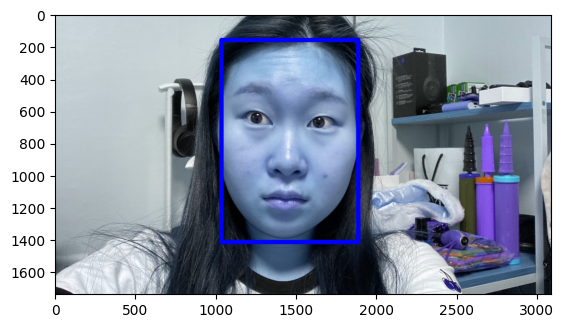

In [24]:
for i in range(len(coco_format['annotations'])):
    image, image_file = checking_pic_right(coco_format,i)
    plt.imshow(image)
    plt.show()
    break